In [24]:
# hypothesis_testing.ipynb
# hypothesis is a claim and the objective of hypothesis testing is to either reject or retain a null hypothesis with help of data. It consists of two complementary statements call null hypothesis and alternative hypothesis. Null hypothesis is an exsiting belief and alternative hypothesis is what we intend to establish with new evidences
# z-test: is used when we need to test the value of population mean, given population variance is known, the population is a normal distribution, sample size is large and population variance is known 
# This program tries to validate the hypothesis/claim that passport applications are processed withing 30 days of submitting the applocation form & all necessary documents
# Population Mean - 30 Days (given)
# The file passport.csv contains fictional processing time of 40 applicant
# Population Standard Deviation - 12.5 Days
# Significance level = 95% or alpha = 0.05
# Hypothesis => pop_mean, that is mean processing time of passports
# H0: pop_mean >= 30
# Ha: pop_mean < 30

In [ ]:
#Importing required libraries
import pandas as pd
import math
import os
from scipy import stats

In [29]:
# Creating data frame for the share by reading from the .csv file
passport_df = pd.read_csv('passport.csv')
print(list(passport_df.processing_time))

[16.0, 16.0, 30.0, 37.0, 25.0, 22.0, 19.0, 35.0, 27.0, 32.0, 34.0, 28.0, 24.0, 35.0, 24.0, 21.0, 32.0, 29.0, 24.0, 35.0, 28.0, 29.0, 18.0, 31.0, 28.0, 33.0, 32.0, 24.0, 25.0, 22.0, 21.0, 27.0, 41.0, 23.0, 23.0, 16.0, 24.0, 38.0, 26.0, 28.0]


In [30]:
#defining function for calculating z-test statistics, z-score & p-value for the hypothesis
def z_test(pop_mean, pop_std, sample):
    z_score = (sample.mean() - pop_mean)/(pop_std/math.sqrt(len(sample)))
    return z_score, stats.norm.cdf(z_score)

In [28]:
#Checking the z-test statistic and p-value for the hypothesis
z_test(30, 12.5, passport_df.processing_time)

(-1.4925950555994747, 0.06777160919961511)

In [31]:
# OneSample_t-test
# This program tries to validate the hypothesis/claim using t-test to compare if average cost of the making a movie in the given sample is equal to 50 Crores or not
# Population Mean - INR 500 million (given)
# The file bollywoodmovies.csv contains fictional cost of 40 movies
# Population Standard Deviation is not known
# Significance level = 95% or alpha = 0.05
# Hypothesis => sample_mean equals INR 500 millions
# H0: sample_mean = 500
# Ha: sample_mean != 500

In [32]:
bollywood_movies_df = pd.read_csv('bollywoodmovies.csv')
bollywood_movies_df.head(5)

,production_cost
0,601
1,627
2,330
3,364
4,562


In [33]:
print(list(bollywood_movies_df.production_cost))

[601, 627, 330, 364, 562, 353, 583, 254, 528, 470, 125, 60, 101, 110, 60, 252, 281, 227, 484, 402, 408, 601, 593, 729, 402, 530, 708, 599, 439, 762, 292, 636, 444, 286, 636, 667, 252, 335, 457, 632]


In [34]:
stats.ttest_1samp(bollywood_movies_df.production_cost, 500)

Ttest_1sampResult(statistic=-2.284553287266754, pvalue=0.0278625564067618)

In [ ]:
# TwoSample_t-test
# This program tries to validate the hypothesis/claim using two sample t-test to test the difference between two population means where standard deviation are unknown. We're testing the claim that children who drink health drink will grow taller than the children who don't
# The file healthdrink.csv contains fictional average increase in height over one-year period from two groups: one drinking health drink and other not drinking health drink
# Significance level = 95% or alpha = 0.05

In [51]:
#Importing required libraries
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [40]:
healthdrink_yes_df = pd.read_excel('healthdrink.xlsx', 'healthdrink_yes')

In [41]:
healthdrink_yes_df.head(5)

,height_increase
0,8.6
1,5.8
2,10.2
3,8.5
4,6.8


In [42]:
healthdrink_yes_df.columns

Index(['height_increase'], dtype='object')

In [43]:
healthdrink_no_df = pd.read_excel('healthdrink.xlsx', 'healthdrink_no')

In [44]:
healthdrink_no_df.head(5)

,height_increase
0,5.3
1,9.0
2,5.7
3,5.5
4,5.4


In [45]:
healthdrink_no_df.columns

Index(['height_increase'], dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


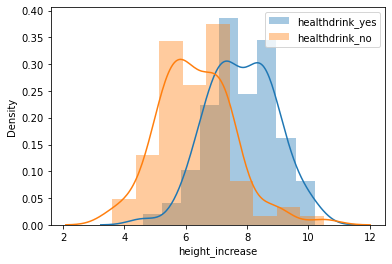

In [52]:
sn.distplot(healthdrink_yes_df['height_increase'], label='healthdrink_yes') 
sn.distplot(healthdrink_no_df['height_increase'], label = 'healthdrink_no') 
plt.legend();

In [53]:
stats.ttest_ind(healthdrink_yes_df['height_increase'], healthdrink_no_df['height_increase'])

Ttest_indResult(statistic=8.131675069083359, pvalue=1.197698592263946e-13)

In [ ]:
#Paired Sample t-test
# It is used for analysis whether an intervention have significantly changed the population parameter values such as mean before and after intervention.
# The objective in this case is to check whether the difference in parameter values is statistically significant before and after intervention or between two types of interventions
# the breakups.csv contains alcohol consumption before and after breakup at 95% confidence

In [ ]:
#Importing required libraries
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [54]:
breakups_df = pd.read_csv('breakups.csv')

In [55]:
breakups_df.head(5)

,Before_Breakup,After_Breakup
0,470,408
1,354,439
2,496,321
3,351,437
4,349,335


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


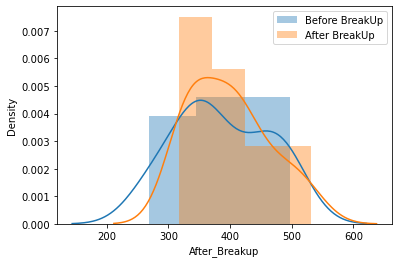

In [56]:
sn.distplot(breakups_df['Before_Breakup'], label='Before BreakUp')
sn.distplot(breakups_df['After_Breakup'], label = 'After BreakUp')
plt.legend();

In [57]:
stats.ttest_rel(breakups_df['Before_Breakup'], breakups_df['After_Breakup'])

Ttest_relResult(statistic=-0.5375404241815105, pvalue=0.5971346738292477)

In [ ]:
# ChiSquared Test
# This test is a non parametric test used for comparing the observed distribution of data with expected dsitribution of the data to decide whether there is any statistically significant difference between observed distribution and theoretical distribution

In [60]:
#observed frequencies
f_obs = [190, 185, 90, 35]

In [61]:
# expected frequencies
f_exp = [500*0.35, 500*0.4, 500*0.2, 500*0.05]
print(f_exp)

[175.0, 200.0, 100.0, 25.0]


In [62]:
stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=7.410714285714286, pvalue=0.05989751420084909)

In [ ]:
# One Way ANOVA
# Sometimes we need to conduct hypothesis test to compare mean values simultaneously for more than two samples created using a factor. One Way ANOVA can be used to study the impact of single treatment at different levels on a continuous response variable
# onestop.csv is used to conduct one-way anova to test if there is any effect of different discounts on average sales

In [66]:
onestop_df = pd.read_csv('onestop.csv')
onestop_df.head(5)

,discount_0,discount_10,discount_20
0,39,34,42
1,32,41,43
2,25,45,44
3,25,39,46
4,37,38,41


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

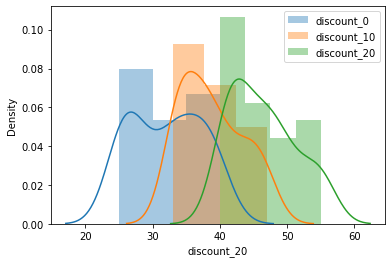

In [73]:
sn.distplot(onestop_df['discount_0'], label = 'discount_0')
sn.distplot(onestop_df['discount_10'], label = 'discount_10')
sn.distplot(onestop_df['discount_20'], label = 'discount_20')
plt.legend()

In [74]:
from scipy.stats import f_oneway
f_oneway(onestop_df['discount_0'], onestop_df['discount_10'], onestop_df['discount_20'])

F_onewayResult(statistic=65.86986401283694, pvalue=3.821500669725641e-18)